## Chapter 10
### This notebook and the figures below are made by Yeseul Lee, under the guidance of Steven Skiena.

In [1]:
from scipy import stats
from scipy.spatial import Voronoi, voronoi_plot_2d, ConvexHull
from astroML.clustering import HierarchicalClustering, get_graph_segments
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

import numpy as np
import matplotlib.pyplot as plt
import math, random
import pandas as pd
%matplotlib inline

### Figure 10.2

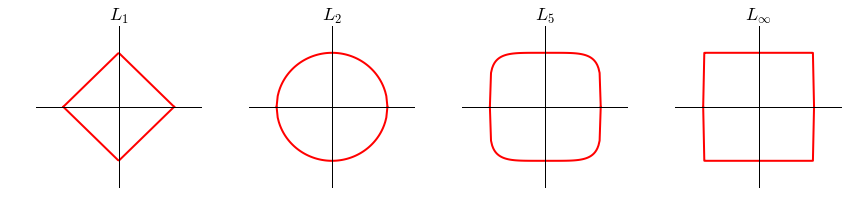

In [2]:
plt.figure(figsize=(12,3))

ax = plt.subplot(141)
x = np.linspace(-1,1,100)
y1 = 1 - np.abs(x)
y2 = -1 * y1
plt.plot(x, y1, 'r-', x, y2, 'r-', linewidth=2)
plt.plot([0,0], [-1.5,1.5], 'k-', [-1.5,1.5], [0,0], 'k-')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5) 
plt.axis("off")
plt.title(r"$L_1$", fontsize=18)

plt.subplot(142)
y1 = np.sqrt(1 - x*x)
y2 = -1 * y1
plt.plot(x, y1, 'r-', x, y2, 'r-', linewidth=2)
plt.plot([0,0], [-1.5,1.5], 'k-', [-1.5,1.5], [0,0], 'k-')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.axis("off")
plt.title(r"$L_2$", fontsize=18)

plt.subplot(143)
y1 = (1 - np.abs(x**5))**(0.2)
y2 = -1*y1
plt.plot(x, y1, 'r-', x, y2, 'r-', linewidth=2)
plt.plot([0,0], [-1.5,1.5], 'k-', [-1.5,1.5], [0,0], 'k-')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.axis("off")
plt.title(r"$L_5$", fontsize=18)

plt.subplot(144)
y1 = (1 - np.abs(x**100))**(0.01)
y2 = -1*y1
plt.plot(x, y1, 'r-', x, y2, 'r-', linewidth=2)
plt.plot([0,0], [-1.5,1.5], 'k-', [-1.5,1.5], [0,0], 'k-')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.axis("off")
plt.title(r"$L_\infty$", fontsize=18)

plt.tight_layout()

### For Figure 10.3, preparing data
#### The source of the data set https://www.statcrunch.com/app/index.php?dataid=1406047
#### Reference: http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#example-neighbors-plot-classification-py

In [3]:
path = "/home/yeseul/practice-notebook/weight.xls"
csv_data = pd.ExcelFile(path).parse('Sheet1')
female = csv_data[(csv_data['Gender'] == 0) & (csv_data['Age'] >=360) & (csv_data['Age'] <=480)] #Age is by the number of months. 20~40
male = csv_data[(csv_data['Gender'] == 1) & (csv_data['Age'] >=360) & (csv_data['Age'] <= 480)]

#Data
x = np.append(female['Weight'], male['Weight'])
y = np.append(female['Height'], male['Height'])
X = np.vstack((x,y)).T
h = .2  # step size in the mesh

#Make labels
a = np.empty(len(female))
a.fill(0)
b = np.empty(len(male))
b.fill(1)
Y = np.append(a, b)

#Fit the data
k = 1
c=neighbors.KNeighborsClassifier(k, weights='uniform')
c.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = c.predict(np.c_[xx.ravel(), yy.ravel()])

### Figure 10.3 Color space by the color of its nearest neighbor

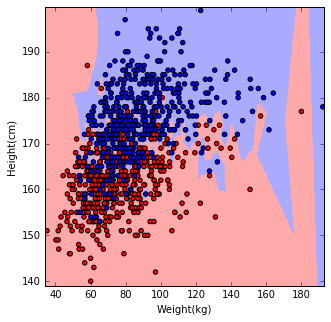

In [4]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(5,5))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#Labels
plt.xlabel('Weight(kg)')
plt.ylabel('Height(cm)')

### Figure 10.4 Color space by the color of its nearest neighbor
From figure 10.3, figure 10.4 is just a simple modification away, which is to change the value of k.
The left figure has k = 3. The right figure has k = 10.

### Figure 10.5 Left - Voronoi diagram
Reference : http://scipy.github.io/devdocs/generated/scipy.spatial.Voronoi.html
http://scipy.github.io/devdocs/generated/scipy.spatial.voronoi_plot_2d.html

[]

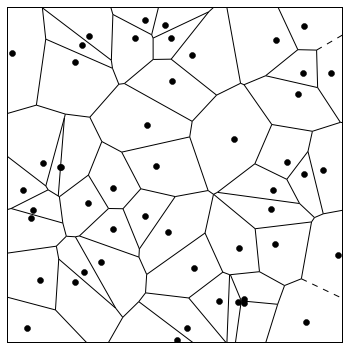

In [5]:
plt.rcParams['figure.figsize'] = 6,6

#generate 50 uniform points
x = np.random.rand(50,2) #2d array with 50 points
#find the voronoi
vor = Voronoi(x)
voronoi_plot_2d(vor, show_vertices=False)
plt.xlim(0,1)
plt.ylim(0,1)

#color the points black
plt.plot(x[:,0], x[:, 1], 'ko')

#Hide the x and y axis.
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])

### Figure 10.11 - K-means
#### The source of the data set https://www.statcrunch.com/app/index.php?dataid=1406047
You can look at figure 9.17, which is another version of this figure but using logistic regression.

[[  69.02926136  161.4375    ]
 [  97.65482456  172.71929825]]


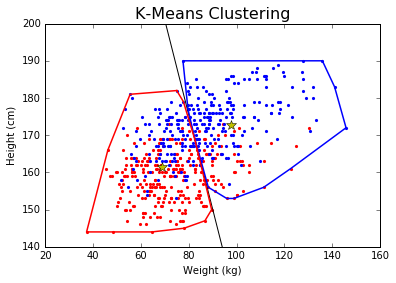

In [6]:
plt.figure(figsize=(6,4))
female = csv_data[(csv_data['Gender'] == 0) & (csv_data['Age'] >=800) & (csv_data['Age'] <=900)] #Age is by the number of months. 20~40
male = csv_data[(csv_data['Gender'] == 1) & (csv_data['Age'] >=800) & (csv_data['Age'] <= 900)]

plt.scatter(female['Weight'], female['Height'], c='red', s=10, lw=0)
plt.scatter(male['Weight'], male['Height'], c='blue', s=10, lw=0)
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")

y = np.append(female["Height"], male["Height"])
x = np.append(female["Weight"], male["Weight"])

z = [[i,j] for i,j in zip(x,y)]
algo = KMeans(n_clusters=2)
algo.fit(z)
label = algo.labels_
centers = algo.cluster_centers_
print centers
plt.plot(centers[:,0], centers[:,1], 'y*', markersize=10)

#Find the perpendicular bisector
midpoint = [(centers[0][0]+centers[1][0])/2.0 , (centers[0][1] + centers[1][1])/2.0]
lineslope = (centers[0][1]-centers[1][1])/(centers[0][0]-centers[1][0])
perslope = -1/lineslope
perx = [60,100]
pery = perslope*(perx - midpoint[0]) + midpoint[1]
plt.plot(perx, pery, 'k-')

#Draw the convex hull instead.
division1 = [i for i,c in zip(z, label) if c == 1]
division1= np.array(division1)
division2 = [i for i,c in zip(z, label) if c == 0]
division2 = np.array(division2)
hull1 = ConvexHull(division1)
hull2 = ConvexHull(division2)

# to make the line come back to the first point, I appended the first vertice to it at last.
plt.plot(np.append(division1[hull1.vertices, 0], division1[hull1.vertices[0],0]), \
         np.append(division1[hull1.vertices,1], division1[hull1.vertices[0],1]),'b-', linewidth=1.5)
plt.plot(np.append(division2[hull2.vertices, 0], division2[hull2.vertices[0],0]), \
         np.append(division2[hull2.vertices,1], division2[hull2.vertices[0],1]),'r-', linewidth=1.5)
plt.xlim(20,160)
plt.ylim(140,200)
plt.title("K-Means Clustering", fontsize=16)

### For Figure 10.12

In [7]:
#Data set
size = 20
x1 = np.random.sample([size]) +2
noise = np.random.normal(2,0.3, size)
y1 = [10]*size + noise

x2 = np.random.sample([size]) +5
noise = np.random.normal(1,0.3, size)
y2 = [8]*size + noise

x3 = np.random.sample([size]) +5
noise = np.random.normal(1,0.3, size)
y3 = [14]*size + noise

x4 = np.random.sample([size]) +7
noise = np.random.normal(1,0.3, size)
y4 = [11]*size + noise

size=100
x5 = np.random.sample([size])*4 + 9
noise = np.random.normal(1,0.1, size)
y5 = [5.9]*size + noise

x6 = np.random.sample([size])*4 + 9
noise = np.random.normal(1,0.1, size)
y6 = [4]*size + noise

x7 = np.random.sample([size])*4 + 9
noise = np.random.normal(1,0.1, size)
y7 = [2.1]*size + noise

x8 = np.linspace(-2,2,30)
f1 = [np.sqrt(4 - i*i) for i in x8]
f1 = np.array(f1)
f2 = -1 * f1

x8 = np.append(x8, x8) +14
y8 = np.append(f1, f2) + 14

x = np.append(x8,y8)
y8 = np.append(y8,x8)
x8 = x

x9 = np.random.sample([size]) +13.5
noise = np.random.normal(1,0.3, size)
y9 = [13]*size + noise

xlst = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
ylst = [y1, y2, y3, y4, y5, y6, y7, y8, y9]
x = []
y = []
for i in xlst:
    x = np.append(x, i)
for j in ylst:
    y = np.append(y, j)
    
X = [[i,j] for i,j in zip(x, y)]
X = np.array(X)

### Figure 10.12

(1, 18)

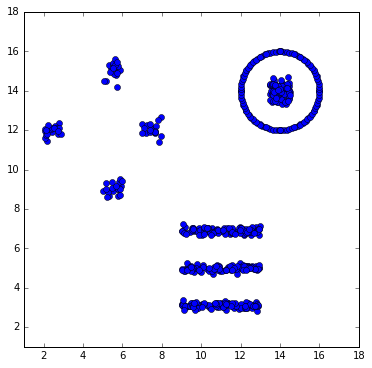

In [8]:
plt.figure(figsize=(6,6))
plt.plot(x, y, 'bo')
plt.xlim(1,18)
plt.ylim(1,18)

### For Figure 10.14, I made these functions.

In [9]:
def initialize_centroids(points, k):
    centroids = random.sample(points, k)
    centroids = np.array(centroids)
    return centroids

# Define the function to find the closest centroid for each point.
def closest_centroid(points, centroids):
    closest = []
    for i in range(0,len(points)):
        k = []
        for j in range(0, len(centroids)):
            k.append(np.sqrt((points[i,0]-centroids[j,0])**2 + (points[i,1]-centroids[j,1])**2))
        closest.append(np.argmin(k))
    return closest

# Define a function for finding the average points of the points assigned to each centroid.
def average_points(points, centroids, cluster):
    result=[]
    for i in range(0, len(centroids)):
        pointsByCluster = []
        for j in range(0,len(cluster)):
            if cluster[j] == i:
                pointsByCluster.append(points[j])
        pointsByCluster=np.array(pointsByCluster)
        result.append([sum(pointsByCluster[:,0])/len(pointsByCluster), \
                       sum(pointsByCluster[:,1])/len(pointsByCluster)])
    return result
                

### Figure 10.14 - Initialization for k-means clustering animation


In [10]:
# Initialize k number of centroids
k = 5
random.seed(7)
centroids = initialize_centroids(X,k)
#Nearest points to the centroid.
nearest = closest_centroid(X, centroids)

centroids = np.array(average_points(X, centroids, nearest ))

### Figure 10.14 - The iterations of K-means

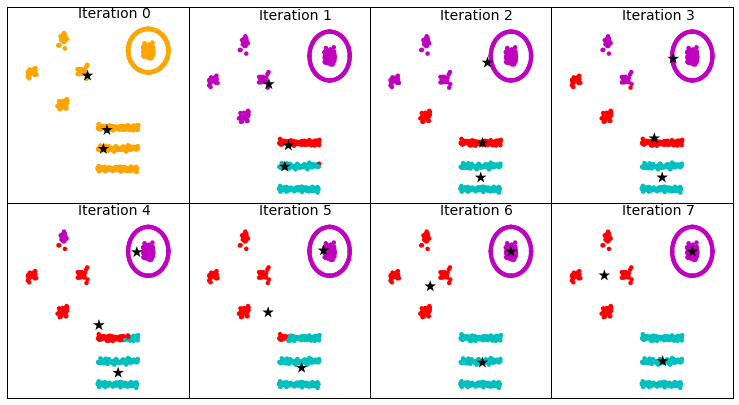

In [11]:
plt.rcParams['figure.figsize'] = 13,7
fig, ax = plt.subplots(2, 4)
plt.subplots_adjust(wspace=0, hspace=0) #Adjust the whitespace between subplots

k=3
random.seed(4)
colors=["red", "m", "c"]
textx = 7
texty = 17

#Just the dots
ax[0,0].scatter(X[:, 0], X[:, 1], color='orange', edgecolor="")
#Add the centroids
ax[0,0].scatter(X[:, 0], X[:, 1], color='orange', edgecolor="")
centroids = initialize_centroids(X,k)
ax[0,0].scatter(centroids[:, 0], centroids[:, 1], color='black', marker="*", s=150, edgecolors="")
#Hide the x and y axis.
ax[0,0].axes.get_xaxis().set_visible(False)
ax[0,0].axes.get_yaxis().set_visible(False)
ax[0,0].text(textx,texty, "Iteration 0", fontsize=14)

#Classify by the nearest centroid
#Nearest points to the centroid.
nearest = closest_centroid(X, centroids)
ax[0,1].scatter(X[:,0], X[:,1], c=[colors[i] for i in nearest], edgecolor="")
ax[0,1].scatter(centroids[:,0], centroids[:,1], color='black',marker="*", s=150, edgecolors="")
#Hide the x and y axis.
ax[0,1].axes.get_xaxis().set_visible(False)
ax[0,1].axes.get_yaxis().set_visible(False)
ax[0,1].text(textx,texty, "Iteration 1", fontsize=14)


#Now move the centroids to the average points classified to.
centroids = np.array(average_points(X, centroids, nearest ))
#Classify by the nearest centroid again.
nearest = closest_centroid(X, centroids)
ax[0,2].scatter(X[:,0], X[:,1], c=[colors[i] for i in nearest], edgecolor="")
ax[0,2].scatter(centroids[:,0], centroids[:,1], color='black', marker="*", s=150, edgecolors="")
#Hide the x and y axis.
ax[0,2].axes.get_xaxis().set_visible(False)
ax[0,2].axes.get_yaxis().set_visible(False)
ax[0,2].text(textx,texty, "Iteration 2", fontsize=14)


#Now move the centroids to the average points classified to.
centroids = np.array(average_points(X, centroids, nearest ))
#Classify by the nearest centroid again.
nearest = closest_centroid(X, centroids)
ax[0,3].scatter(X[:,0], X[:,1], c=[colors[i] for i in nearest], edgecolor="")
ax[0,3].scatter(centroids[:,0], centroids[:,1], color='black', marker="*", s=150, edgecolors="")
#Hide the x and y axis.
ax[0,3].axes.get_xaxis().set_visible(False)
ax[0,3].axes.get_yaxis().set_visible(False)
ax[0,3].text(textx,texty, "Iteration 3", fontsize=14)

#Now move the centroids to the average points classified to.
centroids = np.array(average_points(X, centroids, nearest ))
#Classify by the nearest centroid again.
nearest = closest_centroid(X, centroids)
ax[1,0].scatter(X[:,0], X[:,1], c=[colors[i] for i in nearest], edgecolor="")
ax[1,0].scatter(centroids[:,0], centroids[:,1], color='black', marker="*", s=150, edgecolors="")
#Hide the x and y axis.
ax[1,0].axes.get_xaxis().set_visible(False)
ax[1,0].axes.get_yaxis().set_visible(False)
ax[1,0].text(textx,texty, "Iteration 4", fontsize=14)

#Now move the centroids to the average points classified to.
centroids = np.array(average_points(X, centroids, nearest ))
#Classify by the nearest centroid again.
nearest = closest_centroid(X, centroids)
ax[1,1].scatter(X[:,0], X[:,1], c=[colors[i] for i in nearest], edgecolor="")
ax[1,1].scatter(centroids[:,0], centroids[:,1], color='black', marker="*", s=150, edgecolors="")
#Hide the x and y axis.
ax[1,1].axes.get_xaxis().set_visible(False)
ax[1,1].axes.get_yaxis().set_visible(False)
ax[1,1].text(textx,texty, "Iteration 5", fontsize=14)

#Now move the centroids to the average points classified to.
centroids = np.array(average_points(X, centroids, nearest ))
#Classify by the nearest centroid again.
nearest = closest_centroid(X, centroids)
ax[1,2].scatter(X[:,0], X[:,1], c=[colors[i] for i in nearest], edgecolor="")
ax[1,2].scatter(centroids[:,0], centroids[:,1], color='black', marker="*", s=150, edgecolors="")
#Hide the x and y axis.
ax[1,2].axes.get_xaxis().set_visible(False)
ax[1,2].axes.get_yaxis().set_visible(False)
ax[1,2].text(textx,texty, "Iteration 6", fontsize=14)

#Now move the centroids to the average points classified to.
centroids = np.array(average_points(X, centroids, nearest ))
#Classify by the nearest centroid again.
nearest = closest_centroid(X, centroids)
ax[1,3].scatter(X[:,0], X[:,1], c=[colors[i] for i in nearest], edgecolor="")
ax[1,3].scatter(centroids[:,0], centroids[:,1], color='black', marker="*", s=150, edgecolors="")
#Hide the x and y axis.
ax[1,3].axes.get_xaxis().set_visible(False)
ax[1,3].axes.get_yaxis().set_visible(False)
ax[1,3].text(textx,texty, "Iteration 7", fontsize=14)

### Figure 10.15

error is  17798.4144566 for k =  1
error is  6655.84355085 for k =  2
error is  2308.04327114 for k =  3
error is  1765.94810745 for k =  4
error is  1452.48465421 for k =  5
error is  1217.58548075 for k =  6
error is  1028.63139929 for k =  7
error is  910.669085502 for k =  8
error is  761.659065899 for k =  9


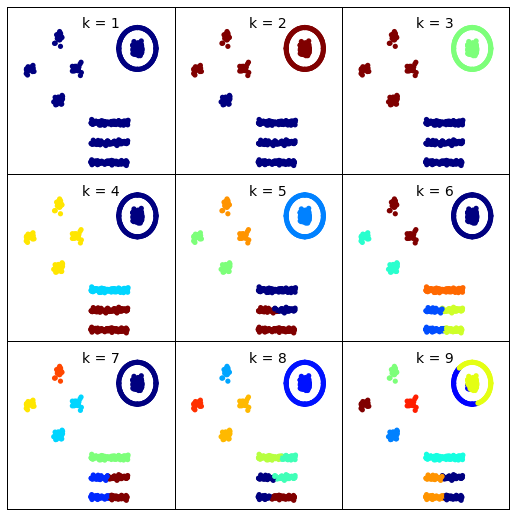

In [12]:
plt.rcParams['figure.figsize'] =9,9
fig, ax = plt.subplots(3, 3)
plt.subplots_adjust(wspace=0, hspace=0) #Adjust the whitespace between subplots
np.random.seed(10)

for i in range(0,3):
    for j in range(0,3):
        result = KMeans(n_clusters= (3*i+j+1))
        yprediction = result.fit_predict(X)
        inertia = result.inertia_
        print 'error is ', inertia, 'for k = ', 3*i+j+1
        ax[i, j].scatter(X[:, 0], X[:, 1], c=yprediction, edgecolor='', s = 27)
        title = 'k = ' +  str(3*i+j+1)
        ax[i, j].text(8, 16, title, fontsize=14)
        #Hide the x and y axis.
        ax[i,j].axes.get_xaxis().set_visible(False)
        ax[i,j].axes.get_yaxis().set_visible(False)

### For Figure 10.16, I made the following functions

In [13]:
# Define the function to find the closest centroid for each point and the sum of squared distance to it.
def sum_of_sqrd_dist(points, centroids):
    distance = []
    closest = []
    for i in range(0,len(points)):
        k = []
        for j in range(0, len(centroids)):
            #a**2 + b**2 = c**2
            k.append((points[i,0]-centroids[j,0])**2 + (points[i,1]-centroids[j,1])**2)
        distance.append(min(k))
    return sum(distance)

#random numbers for centroids.
def initialize_centroids_random(k):
    rlist = []
    for i in range(k):
        rlist.append([random.uniform(0,18), random.uniform(0,18)])
    centroids = np.array(rlist)
    return centroids

### Data points for Figure 10.16

In [14]:
#This is for calculation of MSE (or to be correct the Absolute Error)
errorlist = []
for i in range(1,13):
    result = KMeans(n_clusters=i)
    yprediction = result.fit_predict(X)
    errorlist.append(result.inertia_)
print errorlist

#For calculating sum of squared distance to random centers.
#And the mean of 5 different ones.
random_errorlist = []
num_runs = 30
for i in range(1,13):
    value = 0
    for j in range(num_runs):
        centroids = initialize_centroids_random(i)
        sum_dist = sum_of_sqrd_dist(X, centroids)
        value += sum_dist
    random_errorlist.append(value/float(num_runs))
print random_errorlist

[17798.414456595608, 6655.8435508510593, 2308.0432711423555, 1765.9481074495247, 1457.8125262414303, 1217.5432896329351, 1028.6076645397698, 884.5593404560808, 754.09541750218216, 643.51508469249256, 530.49615495335513, 425.29192689185589]
[54946.823262070189, 38776.407749241669, 20921.0679286983, 16186.727994916715, 12763.196228658773, 10438.591360566073, 9403.0783908174199, 7210.167802727693, 7341.8742586562857, 6283.9382072103117, 5279.9025421874285, 4467.2007327154952]


### Figure 10.16 - Error Curve

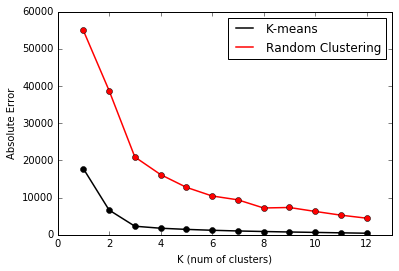

In [15]:
e = errorlist

e2 = random_errorlist

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

plt.rcParams['figure.figsize'] = 6,4
plt.plot(x,e, 'k-', linewidth='1.5', label='K-means')
plt.plot(x,e, 'ko')
plt.plot(x,e2, 'r-', linewidth='1.5', label='Random Clustering')
plt.plot(x,e2, 'ro')

plt.xlim(0,13)

plt.xlabel('K (num of clusters)')
plt.ylabel('Absolute Error')
plt.legend()

### For Figure 10.18, I made the following functions.

In [16]:
def minDistance(L1, L2):
    min = float("inf")
    minvalues = []
    for i in L1:
        for j in L2:
            k = np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)
            if k <= min:
                min = k
                minvalues = (i,j)
    return minvalues

def maxDistance(L1, L2):
    max = 0
    maxvalues = []
    for i in L1:
        for j in L2:
            k = np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)
            if k >= max:
                max = k
                maxvalues = (i,j)
    return maxvalues

### Figure 10.18

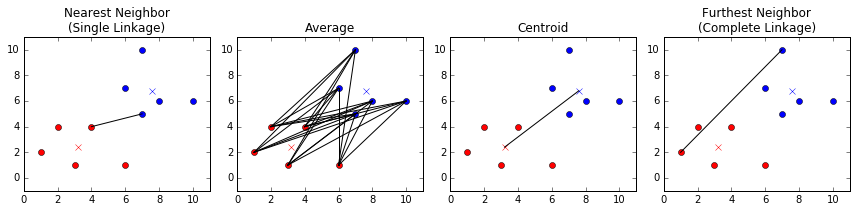

In [17]:
reds = [[1,2],[2,4],[3,1],[4,4],[6,1]]
reds = np.array(reds)
blues = [[6,7], [7,5], [8,6], [7,10], [10,6]]
blues = np.array(blues)
centroidx = [np.mean(reds[:,0]), np.mean(blues[:,0])]
centroidy = [np.mean(reds[:,1]), np.mean(blues[:,1])]

plt.figure(figsize=(12,3))
plt.subplot(141)
plt.plot(reds[:,0], reds[:,1], 'ro', blues[:,0], blues[:,1], "bo",\
        centroidx[0], centroidy[0], 'rx', centroidx[1],centroidy[1], 'bx')
plt.xlim(0,11)
plt.ylim(-1,11)
d = minDistance(reds, blues)
d = np.array(d)
plt.plot(d[:,0], d[:,1], 'k-')
plt.title("Nearest Neighbor\n(Single Linkage)")

plt.subplot(142)
plt.plot(reds[:,0], reds[:,1], 'ro', blues[:,0], blues[:,1], "bo",\
        centroidx[0], centroidy[0], 'rx', centroidx[1],centroidy[1], 'bx')
plt.xlim(0,11)
plt.ylim(-1,11)
for i in reds:
    for j in blues:
        x = [i[0], j[0]]
        y = [i[1], j[1]]
        plt.plot(x, y, 'k-')
plt.title("Average")

plt.subplot(143)
plt.plot(reds[:,0], reds[:,1], 'ro', blues[:,0], blues[:,1], "bo",\
        centroidx[0], centroidy[0], 'rx', centroidx[1],centroidy[1], 'bx')
plt.xlim(0,11)
plt.ylim(-1,11)
plt.plot(centroidx,centroidy,'k-')
plt.title("Centroid")

plt.subplot(144)
plt.plot(reds[:,0], reds[:,1], 'ro', blues[:,0], blues[:,1], "bo",\
        centroidx[0], centroidy[0], 'rx', centroidx[1],centroidy[1], 'bx')
plt.xlim(0,11)
plt.ylim(-1,11)
d = maxDistance(reds, blues)
d = np.array(d)
plt.plot(d[:,0], d[:,1], 'k-')
plt.title("Furthest Neighbor\n(Complete Linkage)")
plt.tight_layout()

### Figure 10.19 Left

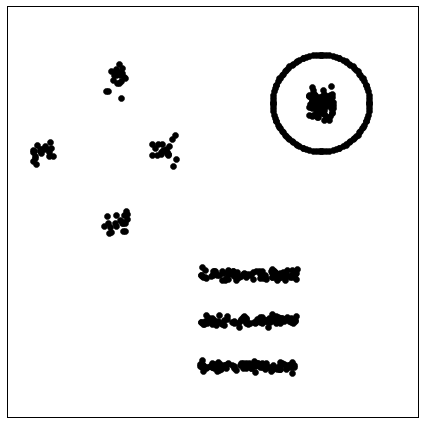

In [18]:
plt.figure(frameon=False, figsize=(6,6))

plt.plot(X[:,0], X[:,1], 'ko', linewidth=1)

plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlim(1,18)
plt.ylim(1,18)
plt.tight_layout()

### For Figure 10.19 Right
#### Source: http://www.astroml.org/book_figures/chapter6/fig_great_wall_MST.html

In [19]:
# Get the x, y coordinates of the beginning and end of each line segment
n_neighbors = 9
edge_cutoff = 0.9
cluster_cutoff = 10
model = HierarchicalClustering(n_neighbors=100)
model.fit(X)
T_x, T_y = get_graph_segments(model.X_train_,
                              model.full_tree_)
T_trunc_x, T_trunc_y = get_graph_segments(model.X_train_,
                                          model.cluster_graph_)

### Figure 10.19 Right

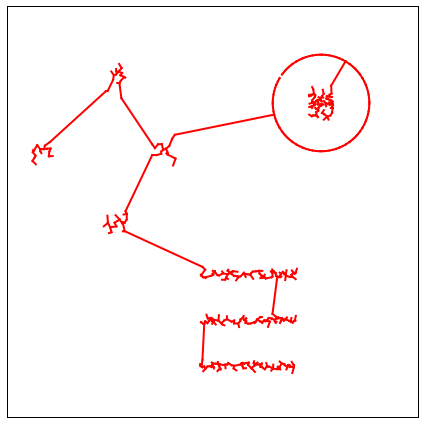

In [20]:
plt.figure(figsize=(6,6))

plt.plot(T_x, T_y, 'r-', linewidth=2)

plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlim(1,18)
plt.ylim(1,18)
plt.tight_layout()

### Figure 10.21 Left

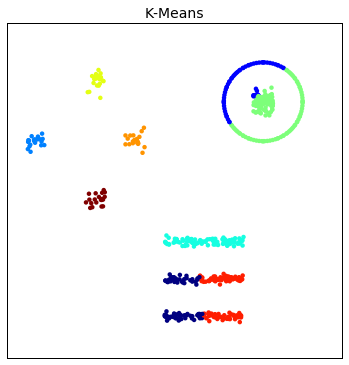

In [21]:
plt.figure(figsize=(6,6))
algo = KMeans(n_clusters=9)
algo.fit(X)
label = algo.labels_

plt.scatter(X[:,0], X[:,1], c=label, edgecolor="")

plt.xlim(1,18)
plt.ylim(1,18)
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.title("K-Means", fontsize=14)

### Figure 10.21 Right

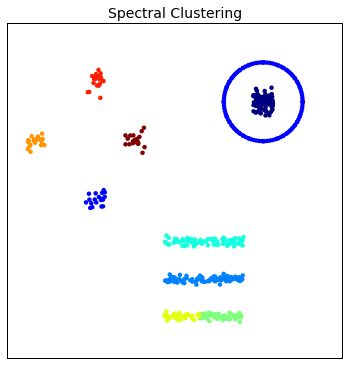

In [22]:
plt.figure(figsize=(6,6))
algo = SpectralClustering(n_clusters=9)
algo.fit(X)
label = algo.labels_

plt.scatter(X[:,0], X[:,1], c=label, edgecolor="")

plt.xlim(1,18)
plt.ylim(1,18)
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.title("Spectral Clustering", fontsize=14)